In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(42)

# Portfolio Planner

In this activity, you will use the iedfinance api to grab historical data for a 60/40 portfolio using `SPY` to represent the stock portion and `AGG` to represent the bonds.

In [3]:
from iexfinance.stocks import get_historical_data
import iexfinance as iex

# Data Collection

In this step, you will need to use the IEX api to fetch closing prices for the `SPY` and `AGG` tickers. Save the results as a pandas DataFrame

In [4]:
# Set the tickers
list_of_tickers = ["SPY", "AGG"]
# YOUR CODE HERE

# Set start and end datetimes of 1 year, between now and 365 days ago.
end_date = datetime.now()
start_date = end_date + timedelta(-365)

# Get historical data for SPY and AGG and print preview
tickers_df = get_historical_data(list_of_tickers, start_date, end_date,  output_format='pandas')
tickers_df.head()

SPY                                       AGG                  \
              open    high     low   close    volume    open    high     low   
date                                                                           
2018-09-04  289.84  290.21  288.68  289.81  57594367  106.02  106.12  105.98   
2018-09-05  289.41  289.64  287.89  289.03  72452437  106.05  106.08  105.96   
2018-09-06  289.15  289.49  287.00  288.16  65909863  106.09  106.27  106.09   
2018-09-07  286.98  288.70  286.71  287.60  73524824  105.92  105.94  105.81   
2018-09-10  288.74  289.04  287.88  288.10  50210903  105.85  105.95  105.85   

                             
             close   volume  
date                         
2018-09-04  106.06  3164000  
2018-09-05  106.01  2788329  
2018-09-06  106.19  2248481  
2018-09-07  105.81  2571740  
2018-09-10  105.91  3305683

# Monte Carlo Simulation

In this step, you will run Monte Carlo Simulations for your portfolio to model portfolio performance at different retirement ages. 

Complete the following steps:
1. Calculate the daily returns for the SPY and AGG closing prices.
2. Calculate volatility for both the SPY and AGG closing prices.
3. Find the last day's closing price for both stocks and save those as variables.
4. Run a Monte Carlo Simulation of at least 100 iterations and generate at least 20 years of closing prices

### HINTS:
There are 252 trading days per year, so the number of records to generate for each Monte Carlo run will be 252 days * 20 years

In [5]:
# Calculate the daily roi for the stocks
# YOUR CODE HERE

# Use the `drop` function with the `level` parameter to drop extra columns in the multi-index DataFrame
tickers_df.drop(columns=['open', 'high', 'low', 'volume'], level=1, inplace=True)

# Use the 'pct_change' function to calculate daily returns of SPY and AGG and drop nulls with 'dropna'
# and print preview
daily_roi = tickers_df.pct_change().dropna()
daily_roi.head()

,SPY,AGG
,close,close
date,,
2018-09-05,-0.002691,-0.000471
2018-09-06,-0.003010,0.001698
2018-09-07,-0.001943,-0.003578
2018-09-10,0.001739,0.000945
2018-09-11,0.003297,-0.001700


In [6]:
# Calculate volatility
# YOUR CODE HERE

# Use the 'std' function to calculate the standard deviation of daily returns for SPY and AGG
std_dev_daily_roi_spy = daily_roi.std()['SPY']['close']
std_dev_daily_roi_agg = daily_roi.std()['AGG']['close']

# Print standard deviation for SPY
std_dev_daily_roi_spy

0.01056675513919183

In [7]:
# Print standard deviation for AGG
std_dev_daily_roi_agg

0.0018363249176875033

In [8]:
# Print 'tail' of ticker DataFrame for comparison for last closing price
tickers_df.tail()

,SPY,AGG
,close,close
date,,
2019-08-26,288.00,113.73
2019-08-27,286.87,114.09
2019-08-28,288.89,114.10
2019-08-29,292.58,114.03
2019-08-30,292.45,114.13


In [9]:
# Save the last day's closing price
# YOUR CODE HERE

# Set last closing prices of SPY and AGG
spy_last_price = tickers_df['SPY']['close'][-1]
agg_last_price = tickers_df['AGG']['close'][-1]

# Compare last closing price of SPY to ticker DataFrame
spy_last_price

292.45

In [10]:
# Compare last closing price of AGG to ticker DataFrame
agg_last_price

114.13

In [11]:
# Setup the Monte Carlo Parameters
number_simulations = 100
number_records = 252 * 30
monte_carlo = pd.DataFrame()

# Initialize empty DataFrame to hold simulated prices for each simulation
simulated_price_df = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

# Use the 'mean' function to calculate the mean of daily returns for SPY and AGG
avg_daily_roi_spy = daily_roi.mean()['SPY']['close']
avg_daily_roi_agg = daily_roi.mean()['AGG']['close']

In [12]:
# Run the Monte Carlo Simulation
for x in range(number_simulations):
    
    # YOUR CODE HERE
    
    # Initialize the simulated prices list with the last closing price of SPY and AGG
    simulated_spy_prices = [spy_last_price]
    simulated_agg_prices = [agg_last_price]
    
    # Simulate the returns for 252 days for 30 years
    for i in range(number_records):
        
        # Calculate the simulated price using the last price within the list
        simulated_spy_price = simulated_spy_prices[-1] * (1 + np.random.normal(avg_daily_roi_spy, std_dev_daily_roi_spy))
        simulated_agg_price = simulated_agg_prices[-1] * (1 + np.random.normal(avg_daily_roi_agg, std_dev_daily_roi_agg))
        
        # Append the simulated price to the list
        simulated_spy_prices.append(simulated_spy_price)
        simulated_agg_prices.append(simulated_agg_price)
    
    # Append a simulated price of each simulation to DataFrame
    simulated_price_df["SPY prices"] = pd.Series(simulated_spy_prices)
    simulated_price_df["AGG prices"] = pd.Series(simulated_agg_prices)
    
    # Calculate the daily ROI of simulated prices
    simulated_daily_roi = simulated_price_df.pct_change()
    
    # Set the portfolio weights (60% SPY; 40% AGG)
    weights = [0.60, 0.40]

    # Use the 'dot' function with the weights to multiply weights with each column's simulated daily ROI
    portfolio_daily_roi = simulated_daily_roi.dot(weights)
    
    # Calculate the normalized, cumulative return series
    portfolio_cumulative_returns[x] = (1 + portfolio_daily_roi.fillna(0)).cumprod()

# Print records from the DataFrame
portfolio_cumulative_returns.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003221,0.993751,0.990608,0.998577,1.005994,1.009237,1.012354,0.993407,1.001867,0.998779,...,1.000518,1.001817,0.993328,1.001643,0.990308,0.996410,1.010720,1.011391,1.009121,1.012374
2,1.008638,0.998116,0.988758,0.997502,1.010094,0.996529,1.004644,0.979220,1.000351,1.009833,...,0.995297,1.005965,0.984266,0.995542,0.988851,0.990480,1.002103,1.012542,1.007085,1.016801
3,1.007142,0.997742,0.992992,0.989107,1.008889,1.000757,1.009043,0.971239,0.999582,1.019691,...,1.002073,1.002261,0.975127,1.001523,0.984702,0.991293,0.995296,1.013284,1.008501,1.026076
4,1.017969,1.000967,0.987328,0.996057,1.009929,0.993268,1.006468,0.967584,1.009574,1.005089,...,1.008298,0.999644,0.973653,1.006288,0.975827,0.993880,0.983964,1.014544,1.012642,1.019982


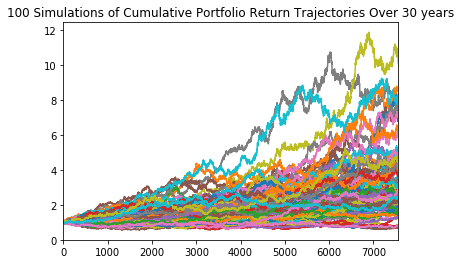

In [13]:
# Visualize the Simulation
# YOUR CODE HERE

# Use the 'plot' function to plot 100 simulations of the potential trajectories of the portfolio based on 30 years
plot_title = f"{x+1} Simulations of Cumulative Portfolio Return Trajectories Over 30 years"
portfolio_cumulative_returns.plot(legend=None, title=plot_title)

In [14]:
# Select the last row for the cumulative returns (cumulative returns at 30 years)
# YOUR CODE HERE

# Select the last row for the cumulative returns (30 years)
thirty_year_cumulative_returns = portfolio_cumulative_returns.iloc[-1, :]
thirty_year_cumulative_returns.head()

0    3.874510
1    3.010300
2    4.611691
3    5.044940
4    4.339702
Name: 7560, dtype: float64

In [15]:
# Select the last row for the cumulative returns (cumulative returns at 20 years)
# YOUR CODE HERE

# Select the row for the cumulative returns (20 years)
# Pulled up index 5039 (252 trading days * 20 years = 5040, -1 since you start at zero)
twenty_year_cumulative_returns = portfolio_cumulative_returns.iloc[5039, :]
twenty_year_cumulative_returns.head()

0    1.839849
1    2.149292
2    1.522442
3    2.472095
4    2.710964
Name: 5039, dtype: float64

In [16]:
# Display the 90% confidence interval for the ending returns
# YOUR CODE HERE

# 'quantile' function to calculate the 90% confidence interval for cumulative returns and print
confidence_interval = twenty_year_cumulative_returns.quantile(q=[0.05, 0.95])
confidence_interval

0.05    0.877266
0.95    3.908105
Name: 5039, dtype: float64

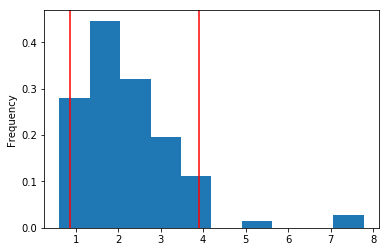

In [17]:
# Visualize the distribution of the ending returns
# YOUR CODE HERE

# 'plot' function to create a probability distribution histogram of cumulative returns
# with markings for a 90% confidence interval
plt.figure();
twenty_year_cumulative_returns.plot(kind='hist', density=True, bins=10)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

---

# Retirement Analysis

In this section, you will use the monte carlo model to answer the following retirement planning questions:

1. What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?
2. Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?
3. Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?
4. How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

### What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?

In [18]:
# YOUR CODE HERE

# 'quantile' function to calculate the 10th percentile for cumulative returns and print
tenth_percentile = thirty_year_cumulative_returns.quantile(q=0.1)
tenth_percentile

1.4289843767932608

In [19]:
# 'quantile' function to calculate the 50th percentile for cumulative returns and print
fiftieth_percentile = thirty_year_cumulative_returns.quantile(q=0.5)
fiftieth_percentile

3.02211243027877

In [20]:
# 'quantile' function to calculate the 90th percentile for cumulative returns and print
ninetieth_percentile = thirty_year_cumulative_returns.quantile(q=0.9)
ninetieth_percentile

5.254527843743952

### Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?

In [26]:
# YOUR CODE HERE

# Set initial investment
initial_investment = 20000

# Calculate portfolio amount at 10th percentile return
tenth_percentile_investment = round(initial_investment + (initial_investment * tenth_percentile), 2)
                                                    
# Print the results
print(f"Given an initial investment of $20,000 in the portfolio"
      f" over the next 30 years, the return at the 10th percentile would "
      f"be ${tenth_percentile_investment}")

Given an initial investment of $20,000 in the portfolio over the next 30 years, the return at the 10th percentile would be $48579.69


In [27]:
# Calculate portfolio amount at 50th percentile return
fiftieth_percentile_investment = round(initial_investment + (initial_investment * fiftieth_percentile), 2)
                                                    
# Print the results
print(f"Given an initial investment of $20,000 in the portfolio"
      f" over the next 30 years, the return at the 50th percentile would "
      f"be ${fiftieth_percentile_investment}")

Given an initial investment of $20,000 in the portfolio over the next 30 years, the return at the 50th percentile would be $80442.25


In [28]:
# Calculate portfolio amount at 90th percentile return
ninetieth_percentile_investment = round(initial_investment + (initial_investment * ninetieth_percentile), 2)
                                                    
# Print the results
print(f"Given an initial investment of $20,000 in the portfolio"
      f" over the next 30 years, the return at the 90th percentile would "
      f"be ${ninetieth_percentile_investment}")

Given an initial investment of $20,000 in the portfolio over the next 30 years, the return at the 90th percentile would be $125090.56


### Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?

Note: This is effectively saying that 90% of the expected returns will be greater than the return at the 10th percentile, so this can help measure the uncertainty about having enough funds at retirement

In [44]:
# YOUR CODE HERE

# Calculate portfolio amount at 90% confidence return
investment_pnl_lower_bound = round(initial_investment + (initial_investment * confidence_interval.iloc[0]), 2)
investment_pnl_upper_bound = round(initial_investment + (initial_investment * confidence_interval.iloc[1]), 2)

# Initialize variable for withdraw rate
withdraw_rate = 0.04

# Calculate values of withdraw rate for 90% confidence returns and 10th percentile returns
ninetieth_lower_withdraw = round((investment_pnl_lower_bound * withdraw_rate), 2)
ninetieth_upper_withdraw = round((investment_pnl_upper_bound * withdraw_rate), 2)
tenth_percentile_withdraw = round((tenth_percentile_investment * withdraw_rate), 2)
                                                    
# Print the results
print(f"There is a 90% chance that an initial investment of $20,000 in the portfolio"
      f" over the next 30 years will end within the range of"
      f" ${investment_pnl_lower_bound} and ${investment_pnl_upper_bound}"
      f" with a lower withdraw value of ${ninetieth_lower_withdraw} and upper of ${ninetieth_upper_withdraw},"
      f" both at 4%."
      f" On the other hand, the return at the 10th percentile is"
      f" ${tenth_percentile_investment}, with a withdraw value of ${tenth_percentile_withdraw} at 4%."
      f" Therefore, the lower withdraw value will still not exceed the 10th percentile return value"
      f" but the upper withdraw value will.")

There is a 90% chance that an initial investment of $20,000 in the portfolio over the next 30 years will end within the range of $37545.32 and $98162.09 with a lower withdraw value of $1501.81 and upper of $3926.48, both at 4%. On the other hand, the updated return at the 10th percentile is $48579.69, with a updated withdraw value of $1943.19 at 4%. Therefore, the lower withdraw value will still not exceed the updated 10th percentile return value but the upper withdraw value will.


### How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

In [45]:
# YOUR CODE HERE

# Set initial investment with a 50% increase
increased_initial_investment = 30000

# Calculate portfolio amount at 10th percentile return with a 50% increase
new_tenth_percentile_investment = round(increased_initial_investment + (increased_initial_investment * tenth_percentile), 2)
                                                    
# Calculate portfolio amount at 90% confidence return with a 50% increase
new_investment_pnl_lower_bound = round(increased_initial_investment + (increased_initial_investment * confidence_interval.iloc[0]), 2)
new_investment_pnl_upper_bound = round(increased_initial_investment + (increased_initial_investment * confidence_interval.iloc[1]), 2)

# Calculate values of withdraw rate for 90% confidence returns and 10th percentile returns with a 50% increase
new_ninetieth_lower_withdraw = round((new_investment_pnl_lower_bound * withdraw_rate), 2)
new_ninetieth_upper_withdraw = round((new_investment_pnl_upper_bound * withdraw_rate), 2)
new_tenth_percentile_withdraw = round((new_tenth_percentile_investment * withdraw_rate), 2)

# Print the results
print(f"There is a 90% chance that with an updated initial investment of $30,000 in the portfolio"
      f" over the next 30 years will end within the range of"
      f" ${new_investment_pnl_lower_bound} and ${new_investment_pnl_upper_bound}"
      f" with a lower withdraw value of ${new_ninetieth_lower_withdraw} and upper of ${new_ninetieth_upper_withdraw},"
      f" both at 4%."
      f" Therefore, the lower limit will still not exceed the new return at the 10th percentile of"
      f" ${new_tenth_percentile_investment}, after also having been increased to"
      f" ${new_tenth_percentile_withdraw}, but the upper limit still will.")

There is a 90% chance that with an updated initial investment of $30,000 in the portfolio over the next 30 years will end within the range of $56317.98 and $147243.14 with a lower withdraw value of $2252.72 and upper of $5889.73, both at 4%. Therefore, the lower limit will still not exceed the new return at the 10th percentile of $72869.53, after also having been increased to $2914.78, but the upper limit will.


### Optional Challenge

In this section, you will calculate and plot the cumulative returns for the median and 90% confidence intervals. This plot shows the expected cumulative returns for any given day between the first day and the last day of investment. 

In [ ]:
# YOUR CODE HERE